# Assignment-11-Text Mining-02-Amazon Product Reviews

1) Extract reviews of any product from ecommerce website like amazon,
2) Perform emotion mining

In [ ]:
pip install scrapy

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=pd.read_csv('extract_reviews.csv')
reviews

,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Kids are v...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I bought t...
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n The book b...
3,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n 499 is far...
4,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Bought thi...
...,...,...
1195,2.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Size small...
1196,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Excellent ...
1197,3.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Yaa\n\n \n
1198,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Good for b...


## Text Preprocessing

In [9]:
reviews=[str(comment).strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['Kids are visual learners and ever since I bough this for my 2.5 year old daughter, she always keeps bringing these books and eagerly enquires about the contents.She learned the names of animals and colours fast, thanks to this library. All you need to do is have patience as kids tend to repeatedly ask the same question multiple times about same item :D',
 "I bought this for my 13 month old son who has just recently shown tendencies to read his books and not chew on them or tear them apart.When I unwrapped the set of books, I felt disappointed as they were smaller in size than I had assumed. But within minutes, I realised that the size was perfect for my son. We spent 40 minutes right away browsing through all the books. Getting that kind of attention span from my son very active son isn't easy usually.Quality and colours are really good. Easy to carry. This book set is a must buy.",
 "The book box is really good. Initially, my daughter kept playing with it to remove the book and put 

In [10]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'Kids are visual learners and ever since I bough this for my 2.5 year old daughter, she always keeps bringing these books and eagerly enquires about the contents.She learned the names of animals and colours fast, thanks to this library. All you need to do is have patience as kids tend to repeatedly ask the same question multiple times about same item :D I bought this for my 13 month old son who has just recently shown tendencies to read his books and not chew on them or tear them apart.When I unwrapped the set of books, I felt disappointed as they were smaller in size than I had assumed. But within minutes, I realised that the size was perfect for my son. We spent 40 minutes right away browsing through all the books. Getting that kind of attention span from my son very active son isn\'t easy usually.Quality and colours are really good. Easy to carry. This book set is a must buy. The book box is really good. Initially, my daughter kept playing with it to remove the book and put it back.

In [11]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Kids are visual learners and ever since I bough this for my 25 year old daughter she always keeps bringing these books and eagerly enquires about the contentsShe learned the names of animals and colours fast thanks to this library All you need to do is have patience as kids tend to repeatedly ask the same question multiple times about same item D I bought this for my 13 month old son who has just recently shown tendencies to read his books and not chew on them or tear them apartWhen I unwrapped the set of books I felt disappointed as they were smaller in size than I had assumed But within minutes I realised that the size was perfect for my son We spent 40 minutes right away browsing through all the books Getting that kind of attention span from my son very active son isnt easy usuallyQuality and colours are really good Easy to carry This book set is a must buy The book box is really good Initially my daughter kept playing with it to remove the book and put it backThe books classificat

In [12]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Kids', 'are', 'visual', 'learners', 'and', 'ever', 'since', 'I', 'bough', 'this', 'for', 'my', '25', 'year', 'old', 'daughter', 'she', 'always', 'keeps', 'bringing', 'these', 'books', 'and', 'eagerly', 'enquires', 'about', 'the', 'contentsShe', 'learned', 'the', 'names', 'of', 'animals', 'and', 'colours', 'fast', 'thanks', 'to', 'this', 'library', 'All', 'you', 'need', 'to', 'do', 'is', 'have', 'patience', 'as', 'kids']


In [14]:
len(text_tokens)

28512

In [15]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Kids', 'visual', 'learners', 'ever', 'since', 'bough', '25', 'year', 'old', 'daughter', 'always', 'keeps', 'bringing', 'books', 'eagerly', 'enquires', 'contentsShe', 'learned', 'names', 'animals', 'colours', 'fast', 'thanks', 'library', 'All', 'need', 'patience', 'kids', 'tend', 'repeatedly', 'ask', 'question', 'multiple', 'times', 'item', 'D', 'bought', '13', 'month', 'old', 'son', 'recently', 'shown', 'tendencies', 'read', 'books', 'chew', 'tear', 'apartWhen', 'unwrapped', 'set', 'books', 'felt', 'disappointed', 'smaller', 'size', 'assumed', 'But', 'within', 'minutes', 'realised', 'size', 'perfect', 'son', 'We', 'spent', '40', 'minutes', 'right', 'away', 'browsing', 'books', 'Getting', 'kind', 'attention', 'span', 'son', 'active', 'son', 'isnt', 'easy', 'usuallyQuality', 'colours', 'really', 'good', 'Easy', 'carry', 'This', 'book', 'set', 'must', 'buy', 'book', 'box', 'really', 'good', 'Initially', 'daughter', 'kept', 'playing', 'remove', 'book', 'put', 'backThe', 'books', 'classif

In [16]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['kids', 'visual', 'learners', 'ever', 'since', 'bough', '25', 'year', 'old', 'daughter', 'always', 'keeps', 'bringing', 'books', 'eagerly', 'enquires', 'contentsshe', 'learned', 'names', 'animals', 'colours', 'fast', 'thanks', 'library', 'all', 'need', 'patience', 'kids', 'tend', 'repeatedly', 'ask', 'question', 'multiple', 'times', 'item', 'd', 'bought', '13', 'month', 'old', 'son', 'recently', 'shown', 'tendencies', 'read', 'books', 'chew', 'tear', 'apartwhen', 'unwrapped', 'set', 'books', 'felt', 'disappointed', 'smaller', 'size', 'assumed', 'but', 'within', 'minutes', 'realised', 'size', 'perfect', 'son', 'we', 'spent', '40', 'minutes', 'right', 'away', 'browsing', 'books', 'getting', 'kind', 'attention', 'span', 'son', 'active', 'son', 'isnt', 'easy', 'usuallyquality', 'colours', 'really', 'good', 'easy', 'carry', 'this', 'book', 'set', 'must', 'buy', 'book', 'box', 'really', 'good', 'initially', 'daughter', 'kept', 'playing', 'remove', 'book', 'put', 'backthe', 'books', 'classif

In [17]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kid', 'visual', 'learner', 'ever', 'sinc', 'bough', '25', 'year', 'old', 'daughter', 'alway', 'keep', 'bring', 'book', 'eagerli', 'enquir', 'contentssh', 'learn', 'name', 'anim', 'colour', 'fast', 'thank', 'librari', 'all', 'need', 'patienc', 'kid', 'tend', 'repeatedli', 'ask', 'question', 'multipl', 'time', 'item', 'd', 'bought', '13', 'month', 'old', 'son', 'recent', 'shown', 'tendenc', 'read', 'book', 'chew', 'tear', 'apartwhen', 'unwrap', 'set', 'book', 'felt', 'disappoint', 'smaller', 'size', 'assum', 'but', 'within', 'minut', 'realis', 'size', 'perfect', 'son', 'we', 'spent', '40', 'minut', 'right', 'away', 'brows', 'book', 'get', 'kind', 'attent', 'span', 'son', 'activ', 'son', 'isnt', 'easi', 'usuallyqu', 'colour', 'realli', 'good', 'easi', 'carri', 'thi', 'book', 'set', 'must', 'buy', 'book', 'box', 'realli', 'good', 'initi', 'daughter', 'kept', 'play', 'remov', 'book', 'put', 'backth', 'book', 'classif', 'well', 'thought', 'give', 'kid', 'flavor', 'differ', 'thing', 'visual

In [18]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

kids visual learners ever since bough 25 year old daughter always keeps bringing books eagerly enquires contentsshe learned names animals colours fast thanks library all need patience kids tend repeatedly ask question multiple times item d bought 13 month old son recently shown tendencies read books chew tear apartwhen unwrapped set books felt disappointed smaller size assumed but within minutes realised size perfect son we spent 40 minutes right away browsing books getting kind attention span son active son isnt easy usuallyquality colours really good easy carry this book set must buy book box really good initially daughter kept playing remove book put backthe books classification well thought give kid flavor different things visualize there minor pictures could done better pictures things indians visualize nest word picture nest big eggs everyones eyes go eggs rather nest anyway quite minor issue observe best books book size small know buying handly kid overall quality information bo

In [19]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['kid', 'visual', 'learner', 'ever', 'since', 'bough', '25', 'year', 'old', 'daughter', 'always', 'keep', 'bring', 'book', 'eagerly', 'enquire', 'contentsshe', 'learn', 'name', 'animal', 'colour', 'fast', 'thank', 'you', 'all', 'need', 'patience', 'kid', 'tend', 'repeatedly', 'ask', 'question', 'multiple', 'time', 'item', 'd', 'buy', '13', 'month', 'old', 'son', 'recently', 'show', 'tendency', 'read', 'book', 'chew', 'tear', 'apartwhen', 'unwrapped', 'set', 'book', 'feel', 'disappointed', 'small', 'size', 'assume', 'but', 'within', 'minute', 'realise', 'size', 'perfect', 'son', 'we', 'spend', '40', 'minute', 'right', 'away', 'browse', 'book', 'get', 'kind', 'attention', 'span', 'son', 'active', 'son', 'be', 'not', 'easy', 'usuallyquality', 'colour', 'really', 'good', 'easy', 'carry', 'this', 'book', 'set', 'must', 'buy', 'book', 'box', 'really', 'good', 'initially', 'daughter', 'keep', 'play', 'remove', 'book', 'put', 'backthe', 'book', 'classification', 'well', 'think', 'give', 'kid',

In [20]:
clean_reviews=' '.join(lemmas)
clean_reviews

"kid visual learner ever since bough 25 year old daughter always keep bring book eagerly enquire contentsshe learn name animal colour fast thank you all need patience kid tend repeatedly ask question multiple time item d buy 13 month old son recently show tendency read book chew tear apartwhen unwrapped set book feel disappointed small size assume but within minute realise size perfect son we spend 40 minute right away browse book get kind attention span son active son be not easy usuallyquality colour really good easy carry this book set must buy book box really good initially daughter keep play remove book put backthe book classification well think give kid flavor different thing visualize there minor picture could do well picture thing indian visualize nest word picture nest big egg everyone eye go eggs rather nest anyway quite minor issue observe good book book size small know buying handly kid overall quality information book book box quality make work buy 23 year kid 499 far much

## Feature Extaction

### 1. Using CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [22]:
print(cv.vocabulary_)

{'kid': 1186, 'visual': 2247, 'learner': 1244, 'ever': 764, 'since': 1897, 'bough': 382, '25': 46, 'year': 2338, 'old': 1491, 'daughter': 602, 'always': 167, 'keep': 1183, 'bring': 393, 'book': 332, 'eagerly': 695, 'enquire': 750, 'contentsshe': 554, 'learn': 1243, 'name': 1411, 'animal': 180, 'colour': 502, 'fast': 819, 'thank': 2070, 'you': 2348, 'all': 152, 'need': 1422, 'patience': 1566, 'tend': 2062, 'repeatedly': 1795, 'ask': 216, 'question': 1726, 'multiple': 1404, 'time': 2124, 'item': 1152, 'buy': 406, '13': 11, 'month': 1384, 'son': 1964, 'recently': 1765, 'show': 1885, 'tendency': 2063, 'read': 1747, 'chew': 461, 'tear': 2055, 'apartwhen': 193, 'unwrapped': 2198, 'set': 1871, 'feel': 826, 'disappointed': 660, 'small': 1928, 'size': 1905, 'assume': 221, 'but': 404, 'within': 2307, 'minute': 1362, 'realise': 1752, 'perfect': 1571, 'we': 2269, 'spend': 1981, '40': 75, 'right': 1816, 'away': 247, 'browse': 397, 'get': 897, 'kind': 1216, 'attention': 227, 'span': 1974, 'active': 

In [23]:
print(cv.get_feature_names()[150:300])

['al', 'alfabet', 'all', 'allclear', 'allhe', 'allow', 'allworth', 'almost', 'alone', 'along', 'alot', 'alphabet', 'alphabetsthe', 'already', 'also', 'alternative', 'although', 'always', 'alwaysdelivere', 'amaze', 'amazed', 'amazing', 'amazingi', 'amazingly', 'amazon', 'amazone', 'american', 'amlost', 'amount', 'and', 'animal', 'animalsbird', 'animalsfruitsvegetable', 'animate', 'anither', 'another', 'ant', 'any', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'apartwhen', 'appeal', 'appear', 'appearance', 'appel', 'apple', 'apply', 'appreciate', 'apprehensive', 'appropriate', 'apt', 'aptly', 'area', 'around', 'aroundlovely', 'aroundother', 'arrange', 'arrangment', 'arrival', 'arrive', 'article', 'as', 'aside', 'ask', 'aso', 'assemble', 'asset', 'assorted', 'assume', 'assumed', 'at', 'ate', 'atleast', 'attach', 'attention', 'atteractive', 'attract', 'attractive', 'attractiveeasy', 'attractivequality', 'atttactive', 'audience', 'authentic', 'autism', 'av', 'available', 'available

In [24]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(reviewscv.toarray().shape)

(17536, 2414)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [26]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [27]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', 'also', 'amazing', 'amazon', 'animal', 'attractive', 'baby', 'big', 'bit', 'board', 'book', 'box', 'but', 'buy', 'can', 'child', 'clear', 'collection', 'color', 'colour', 'colourful', 'content', 'could', 'daughter', 'do', 'easily', 'easy', 'enjoy', 'every', 'excellent', 'first', 'fruit', 'get', 'gift', 'give', 'go', 'good', 'great', 'hand', 'happy', 'hard', 'he', 'hold', 'image', 'its', 'keep', 'kid', 'learn', 'library', 'like', 'little', 'look', 'lot', 'love', 'make', 'many', 'material', 'money', 'month', 'much', 'must', 'my', 'nice', 'not', 'old', 'one', 'page', 'paper', 'perfect', 'picture', 'play', 'price', 'print', 'product', 'purchase', 'quality', 'read', 'really', 'recommend', 'see', 'set', 'she', 'show', 'size', 'small', 'son', 'start', 'tear', 'they', 'thing', 'this', 'time', 'toddler', 'use', 'useful', 'very', 'well', 'worth', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 3. TF-IDF Vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [29]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '100', '10month', '12', '13', '14', '15', '16', '18', '1st', '1year', '20', '23', '25', '2nd', '399', '400', '499', 'abc', 'able', 'absolutely', 'accord', 'actual', 'actually', 'add', 'adult', 'affordable', 'age', 'ahead', 'all', 'almost', 'alphabet', 'already', 'also', 'always', 'amazing', 'amazon', 'and', 'animal', 'apart', 'appropriate', 'apt', 'around', 'arrive', 'as', 'ask', 'at', 'atleast', 'attach', 'attention', 'attract', 'attractive', 'avoid', 'away', 'awesome', 'baby', 'back', 'background', 'bad', 'basic', 'be', 'beautiful', 'begin', 'beginner', 'believe', 'big', 'bind', 'bird', 'birthday', 'bit', 'bite', 'board', 'book', 'box', 'boy', 'bright', 'bring', 'build', 'but', 'buy', 'buying', 'can', 'card', 'cardboard', 'carry', 'case', 'change', 'check', 'chew', 'child', 'children', 'choice', 'choose', 'clean', 'clear', 'cm', 'collection', 'color', 'colorful', 'colour', 'colourful', 'come', 'common', 'compact', 'compare', 'complete', 'condition', 'confuse', 'contain', 'cont

### Generate Word Cloud

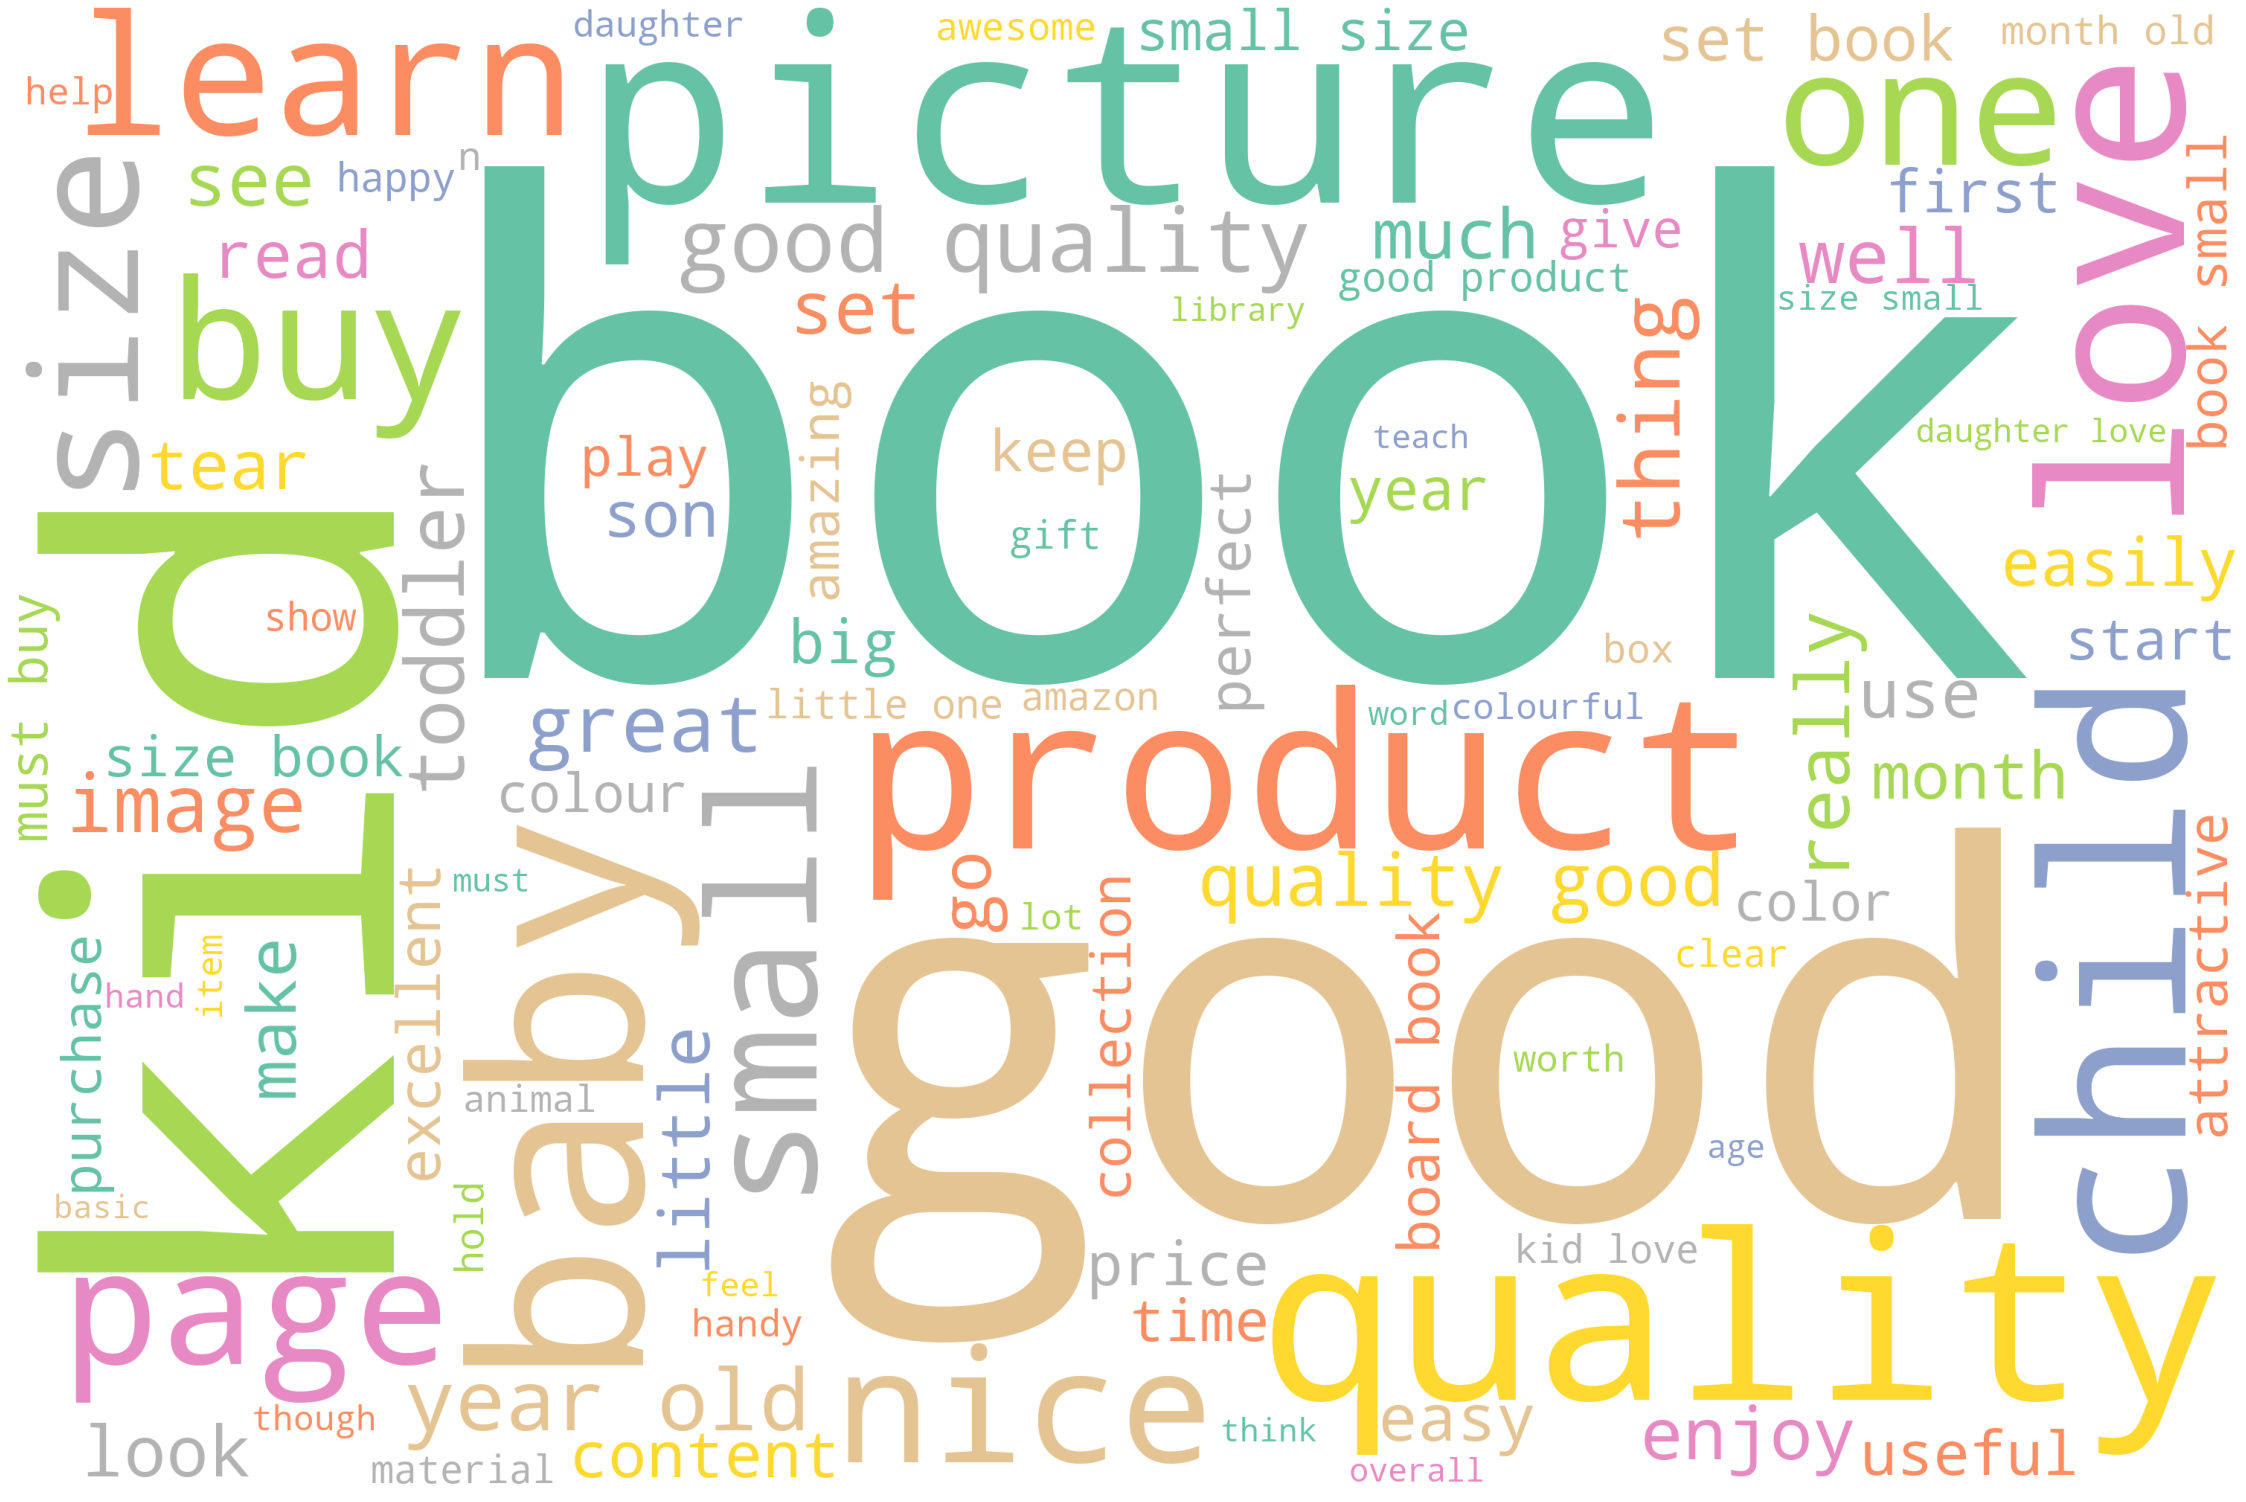

In [30]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [31]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [32]:
for token in doc_block[100:200]:
    print(token,token.pos_)

play NOUN
remove NOUN
book NOUN
put VERB
backthe PROPN
book NOUN
classification NOUN
well ADV
think VERB
give VERB
kid ADJ
flavor NOUN
different ADJ
thing NOUN
visualize VERB
there ADV
minor ADJ
picture NOUN
could AUX
do VERB
well ADV
picture VERB
thing NOUN
indian ADJ
visualize PROPN
nest NOUN
word NOUN
picture NOUN
nest NOUN
big ADJ
egg NOUN
everyone PRON
eye NOUN
go VERB
eggs PROPN
rather ADV
nest VERB
anyway INTJ
quite ADJ
minor ADJ
issue NOUN
observe VERB
good PROPN
book PROPN
book PROPN
size NOUN
small ADJ
know VERB
buying NOUN
handly ADV
kid ADJ
overall ADJ
quality NOUN
information NOUN
book PROPN
book PROPN
box PROPN
quality NOUN
make VERB
work NOUN
buy VERB
23 NUM
year NOUN
kid NOUN
499 NUM
far ADV
much ADV
10 NUM
tiny ADJ
book NOUN
book NOUN
strong ADJ
also ADV
baby NOUN
easily ADV
tear VERB
apart ADV
buy VERB
set PROPN
board NOUN
book NOUN
daughtervery NOUN
handy ADV
learn VERB
basic ADJ
stuffseven ADV
though SCONJ
area NOUN
lockdown VERB
free ADJ
neighbouring NOUN
area NOUN

In [33]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['neighbouring', 'area', 'seal', 'amazon', 'deliver', 'product', 'time', 'promisedlooke', 'product', 'daughter', 'learn', 'stuffs', 'seem', 'get', 'thisone', 'month', 'usage', 'durability', 'test', 'book', 'baby', 'colourful', 'choice', 'baby', 'chew', 'taste', 'book', 'baby', 'chew', 'bite', 'affect', 'remain', 'form', 'yrs', 'book', 'start', 'say', 'c', 'expect', 'start', 'number', 'colorsquality', 'book', 'tear', 's', 'child', 'handle', 'book', 'size', 'book', 'fit', 'palm', 'carry', 'bag', 'case', 'want', 'keep', 'child', 'occupy', 'recommend', 'board', 'book', 'child', 'year', 'kid', 'flip', 'page', 'identify', 'animal', 'fruit', 'kid', 'hold', 'size', 'enjoy', 'book', 'gifted', 'book', 'nephew', 'research', 'book', 'conclude', 'get', 'amazon', 'color', 'get', 'feel', 'book', 'size', 'design', 'corner', 'keep', 'avoid', 'baby', 'content', 'research', 'grandson', 'book', 'month', 'age', 'reveal']


In [34]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,book,898
1,quality,360
2,kid,314
3,size,226
4,product,226
5,love,224
6,picture,223
7,baby,213
8,buy,176
9,page,168


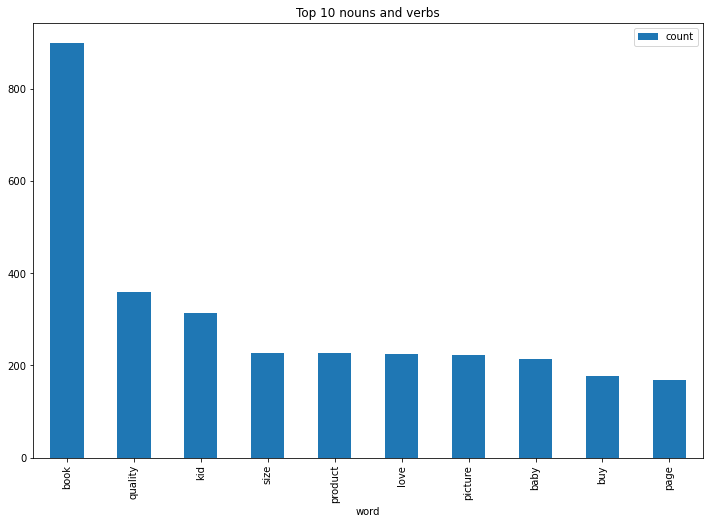

In [35]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [36]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Kids are visual learners and ever since I bough this for my 2.5 year old daughter, she always keeps bringing these books and eagerly enquires about the contents.She learned the names of animals and colours fast, thanks to this library.',
 'All you need to do is have patience as kids tend to repeatedly ask the same question multiple times about same item :D I bought this for my 13 month old son who has just recently shown tendencies to read his books and not chew on them or tear them apart.When I unwrapped the set of books, I felt disappointed as they were smaller in size than I had assumed.',
 'But within minutes, I realised that the size was perfect for my son.',
 'We spent 40 minutes right away browsing through all the books.',
 "Getting that kind of attention span from my son very active son isn't easy usually.Quality and colours are really good.",
 'Easy to carry.',
 'This book set is a must buy.',
 'The book box is really good.',
 "Initially, my daughter kept playing with it to 

In [37]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Kids are visual learners and ever since I boug...
1,All you need to do is have patience as kids te...
2,"But within minutes, I realised that the size w..."
3,We spent 40 minutes right away browsing throug...
4,Getting that kind of attention span from my so...
...,...
2074,Quality is good.Picturization is also good.Pri...
2075,Size small..
2076,Excellent quality of the book and its contents...
2077,But few vegetables and fruits are not a common...


In [40]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [41]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [42]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [43]:
# manual testing
calculate_sentiment(text='good service')

3

In [44]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       2
1      -2
2       3
3       0
4       7
       ..
2074    9
2075    0
2076    3
2077    0
2078    9
Name: sentiment_value, Length: 2079, dtype: int64

In [45]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       40
1       70
2       13
3       11
4       20
        ..
2074    14
2075     2
2076    16
2077    10
2078    22
Name: word_count, Length: 2079, dtype: int64

In [46]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
758,No worry of these getting torn or damage if yo...,-7,19
366,The finish overall is poor Size of book is sma...,-6,42
529,He can roughly use it without a worry of damage.,-6,10
102,This are pocket books.Wrong way to sell item b...,-6,35
296,Palm sized board books for babies .. easy to h...,-5,16
...,...,...,...
632,Very much satisfied product....my daughter lik...,24,49
1990,Very usefull for infants Good and handy Good f...,25,46
2052,"Very good build quality is great, clear pictur...",26,65
1545,We are able to teach her too... Nice books lik...,27,94


In [47]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    2079.000000
mean        2.823954
std         3.659442
min        -7.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: sentiment_value, dtype: float64

In [48]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,All you need to do is have patience as kids te...,-2,70
3,We spent 40 minutes right away browsing throug...,0,11
6,This book set is a must buy.,0,7
8,"Initially, my daughter kept playing with it to...",0,31
11,The book size is small which is just to know b...,0,17
...,...,...,...
2067,with lot of content.,0,4
2070,As my child is on learning stage.,0,7
2073,Highly dissatisfied bcoz it was bought for gif...,0,9
2075,Size small..,0,2


In [49]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Kids are visual learners and ever since I boug...,2,40
2,"But within minutes, I realised that the size w...",3,13
4,Getting that kind of attention span from my so...,7,20
5,Easy to carry.,1,3
7,The book box is really good.,3,6
...,...,...,...
2071,This helps him alot to recognize pictures and ...,2,12
2072,Thank you The product is too small compared to...,2,14
2074,Quality is good.Picturization is also good.Pri...,9,14
2076,Excellent quality of the book and its contents...,3,16


In [50]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Kids are visual learners and ever since I boug...,2,40,0
1,All you need to do is have patience as kids te...,-2,70,1
2,"But within minutes, I realised that the size w...",3,13,2
3,We spent 40 minutes right away browsing throug...,0,11,3
4,Getting that kind of attention span from my so...,7,20,4
...,...,...,...,...
2074,Quality is good.Picturization is also good.Pri...,9,14,2074
2075,Size small..,0,2,2075
2076,Excellent quality of the book and its contents...,3,16,2076
2077,But few vegetables and fruits are not a common...,0,10,2077


C:\Users\Soham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

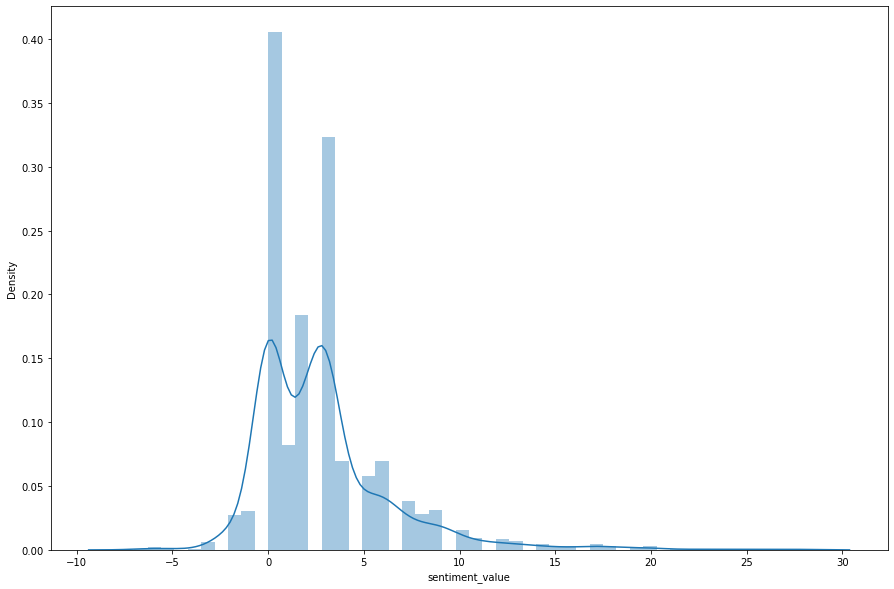

In [51]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

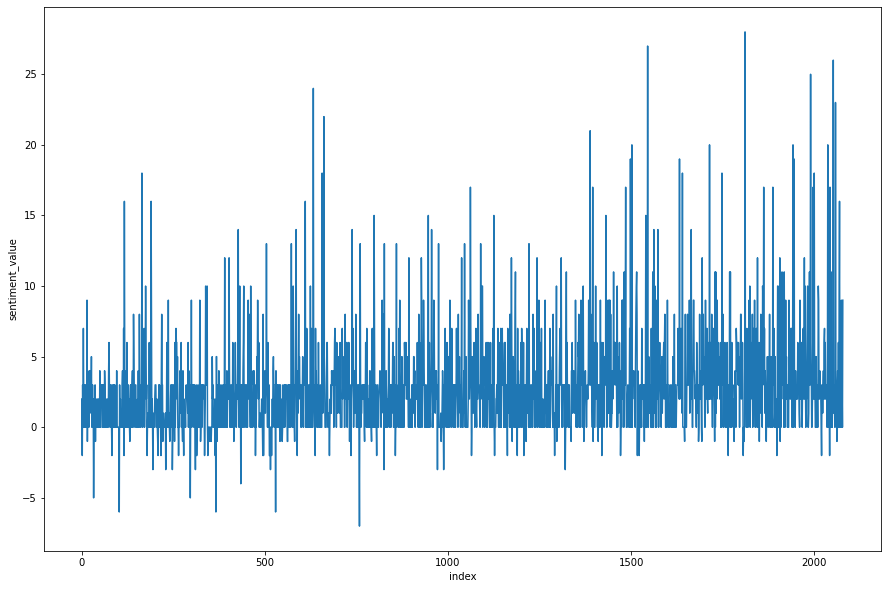

In [52]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)